In [114]:
import pandas as pd
import numpy as np
import ast
from matplotlib import pyplot as plt
from adjustText import adjust_text

In [5]:
df= pd.read_csv('data_jobs.csv')

In [11]:
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [76]:
df_da_sl = df[(df['job_title_short'] == 'Data Analyst') & 
               (df['job_country'].isin(['Sri Lanka', 'India']))].copy()


In [78]:
df_da_sl = df_da_sl.dropna(subset=['salary_year_avg'])
df_da_sl_explode = df_da_sl.explode('job_skills')
df_da_sl_explode[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


In [80]:
df_da_skill=df_da_sl_explode.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_da_skill= df_da_skill.rename(columns={'count': 'skill_count', 'median':'median_salary'})
df_da_skill

,skill_count,median_salary
job_skills,,
sql,48,96050.0
excel,40,98500.0
python,37,93600.0
tableau,21,105000.0
r,19,79200.0
...,...,...
postgresql,1,165000.0
ms access,1,64600.0
mysql,1,165000.0


In [86]:
df_da_len=len(df_da_sl)
df_da_len
df_da_skill['skill_perc'] = df_da_skill['skill_count']/df_da_len*100
df_da_skill

,skill_count,median_salary,skill_perc
job_skills,,,
sql,48,96050.0,48.979592
excel,40,98500.0,40.816327
python,37,93600.0,37.755102
tableau,21,105000.0,21.428571
r,19,79200.0,19.387755
...,...,...,...
postgresql,1,165000.0,1.020408
ms access,1,64600.0,1.020408
mysql,1,165000.0,1.020408


In [92]:
skill_perc= 5
df_da_demand = df_da_skill[df_da_skill['skill_perc']>skill_perc]
df_da_demand

,skill_count,median_salary,skill_perc
job_skills,,,
sql,48,96050.00,48.979592
excel,40,98500.00,40.816327
python,37,93600.00,37.755102
tableau,21,105000.00,21.428571
r,19,79200.00,19.387755
power bi,18,111175.00,18.367347
azure,16,86400.00,16.326531
aws,12,79200.00,12.244898
spark,11,111175.00,11.224490


([Text(49.042435735887096, 97688.96428571429, 'sql'),
  Text(41.91917842741934, 102324.25, 'excel'),
  Text(39.48221270161291, 93335.28571428571, 'python'),
  Text(23.705922379032256, 104370.94642857142, 'tableau'),
  Text(19.464894153225803, 78653.67857142857, 'r'),
  Text(21.725113407258064, 115545.57142857142, 'power bi'),
  Text(17.9171875, 90224.25, 'azure'),
  Text(13.770173891129033, 81658.44642857142, 'aws'),
  Text(14.075453629032257, 115545.57142857142, 'spark'),
  Text(13.902608366935485, 77014.71428571429, 'oracle'),
  Text(12.491355846774194, 86463.32142857142, 'word'),
  Text(14.505897177419357, 108989.71428571429, 'powerpoint'),
  Text(9.272857862903226, 115545.57142857142, 'looker'),
  Text(7.589960937500003, 85482.69642857142, 'hadoop'),
  Text(9.331741431451615, 165420.9642857143, 'mongodb'),
  Text(7.4662046370967765, 102203.67857142858, 'flow'),
  Text(8.176561239919353, 80292.64285714286, 'redshift'),
  Text(8.439024697580644, 71453.67857142855, 'sql server')],
  <

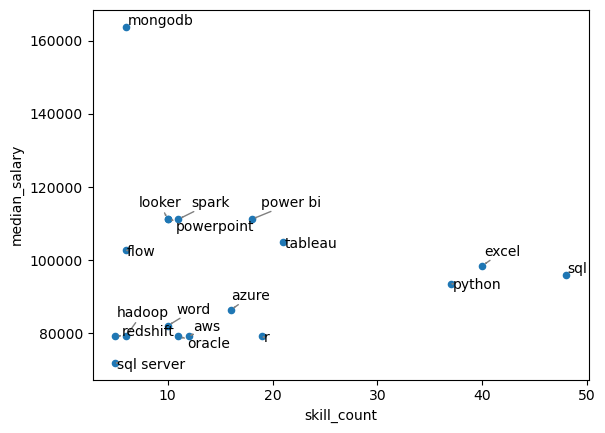

In [116]:

df_da_demand.plot(kind='scatter',x='skill_count', y= 'median_salary')
texts = []
for i, txt in enumerate(df_da_demand.index):
        texts.append(plt.text(df_da_demand['skill_count'].iloc[i], df_da_demand['median_salary'].iloc[i],txt))

adjust_text(texts, arrowprops = dict(arrowstyle = '->',color = 'gray'))

